
## <font color = blue> **Business Understanding** </font>
The Titanic dataset revolves around comprehending the factors influencing passenger survival during the tragic maritime event. By analyzing demographic and other relevant attributes, this study aims to gain insights into the dynamics that contributed to survival outcomes, aiding in the development of potential strategies for passenger safety in similar scenarios.

## <font color = blue> **Problem Statement** </font>

To understand the behavior and correlation of all the variables against Target varibale **Survived**.<br>
Note: EDA (Exploratory Data Analysis) steps will be performed to attempt a solution for given problem statement 

- Investigate the factors that influenced passenger survival during the Titanic disaster.
- Analyze the relationship between demographic attributes (e.g., age, gender, class) and survival outcomes.
- Identify any patterns or correlations within the dataset to understand the dynamics of passenger survival.
- Develop predictive models to estimate the likelihood of survival based on available passenger information.
- Use data visualization techniques to present key insights and findings in an easily interpretable manner.

---

### <font color = blue> **EDA steps to be accomplished** </font>

---

1. Reading and Understanding Data
  - Checking for Incorrect Datatypes, Missing values and Null values
  - Checking Outliers and Invalid values
2. Data Visualization
  - Comparing Survived against different variables
    - Survived Vs Pclass
    - Survived Vs Sex
    - Survived Vs Age
      - Survived Vs Age_Bins
    - Survived Vs SibSp
    - Survived Vs Parch
    - Survived Vs Embarked
3. Data Preparation
  - Dropping Irrelevant variables
  - Convert Categorical variable to Ordinal variables
  - Visualize Correlation between all variables

In [1]:
# command to ignore warnings during filtering
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd

# data visualization library
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning library
from sklearn.preprocessing import LabelEncoder

# commands to display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Step 1: **Reading and Understanding Data**

In [3]:
# reading data
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking no. of rows and columns
train_df.shape

(891, 12)

##### There are 891 rows and 11 columns with 1 target column making total 12 columns

### 1.1 Checking for **Incorrect Datatypes, Missing values and Null values**

In [5]:
# summary of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 891 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  891 non-null    int64  

 1   Survived     891 non-null    int64  

 2   Pclass       891 non-null    int64  

 3   Name         891 non-null    object 

 4   Sex          891 non-null    object 

 5   Age          714 non-null    float64

 6   SibSp        891 non-null    int64  

 7   Parch        891 non-null    int64  

 8   Ticket       891 non-null    object 

 9   Fare         891 non-null    float64

 10  Cabin        204 non-null    object 

 11  Embarked     889 non-null    object 

dtypes: float64(2), int64(5), object(5)

memory usage: 83.7+ KB


- Datatype for `Age` column needs to be changed as age in never in fractional form.
- Columns like `Cabin, Age` have huge number of missing values which needs to be treated before proceedings.
- Even `Embarked` is having null values which can be imputed.

In [6]:
# counting null/na values in the columns
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# calculating percentage of missing values
((train_df.isna()|train_df.isnull()).sum() * 100 / len(train_df)).round(2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

#### If a column has missing value percentage more than 50% than those columns should not be dropped as it could significantly affect the final outcome.
1. The percentage of `Age` column with missing values is 19.87% which can be dropped.
2. `Cabin` column has higher number of missing value i.e. 77.10%, hence, these can't be dropped but could be imputed using mode (selecting most frequent value).
3. Similarly, `Embarked` column could be imputed using mode.

In [8]:
# 1. Dropping missing values in 'Age' column
train_df=train_df[train_df['Age'].notnull()]

In [9]:
# Cross-checking the changes
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [10]:
# Changing datatype of Age column to 'int' type
train_df['Age'] = train_df['Age'].astype('int64')

In [11]:
# confirming changes
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
# 2. & 3. Imputing null values with most frequent values in Cabin and Embarked coulmns using mode()
train_df.fillna(train_df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [13]:
# conforming changes
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 1.2 Checking **Outliers and Invalid values**

In [14]:
# describing dataset
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.679272,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.536483,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


* There seems to be have no outliers and invalid values in the data.

# Step 2: Data Visualization

In [15]:
# Data observing
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [16]:
# data summary
train_df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 714 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  714 non-null    int64  

 1   Survived     714 non-null    int64  

 2   Pclass       714 non-null    int64  

 3   Name         714 non-null    object 

 4   Sex          714 non-null    object 

 5   Age          714 non-null    int64  

 6   SibSp        714 non-null    int64  

 7   Parch        714 non-null    int64  

 8   Ticket       714 non-null    object 

 9   Fare         714 non-null    float64

 10  Cabin        714 non-null    object 

 11  Embarked     714 non-null    object 

dtypes: float64(1), int64(6), object(5)

memory usage: 72.5+ KB


## 2.1 Comparing `Survived` against different variables

### 2.1.1 Survived Vs Pclass

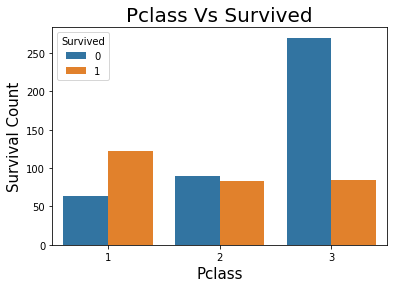

In [17]:
# Visualizing 'Survived' Vs 'Pclass'
sns.countplot(x='Pclass', data=train_df, hue='Survived')
plt.title('Pclass Vs Survived', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

1. We can clear see and understand that passengers of with `3rd class ticket had very low chance of surviving`.
2. Where, passengers of `1st class ticket had higher chances of surviving`.
3. Passenger with `2nd class ticket had mix match chances` of surviving and dying. 

### 2.1.2 Survived Vs Sex

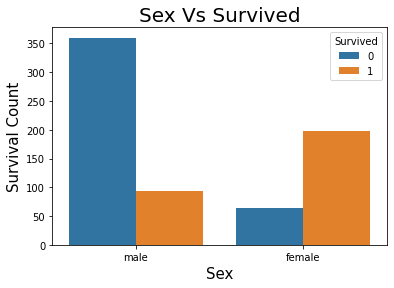

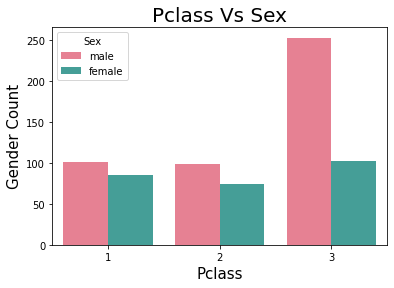

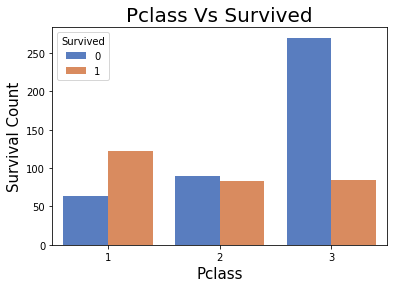

In [18]:
# Visualizing 'Survived' Vs 'Sex'
sns.countplot(x='Sex', data=train_df, hue='Survived')
plt.title('Sex Vs Survived', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Sex'
sns.countplot(x='Pclass', data=train_df, hue='Sex', palette='husl')
plt.title('Pclass Vs Sex', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Gender Count', fontsize=15)
plt.show()

# Visualizing 'Survived' Vs 'Pclass'
sns.countplot(x='Pclass', data=train_df, hue='Survived', palette='muted')
plt.title('Pclass Vs Survived', fontsize=20)
plt.xlabel('Pclass', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

1. This visualization shows that more number of females were able to survive the accident.<br>
`Note: The reason behind this could be as number of life boats were less and therefore females were considered above males`
2. As we saw in `Pclass Vs Survived` visualization that passengers in 3rd class had lowest survival rate and above visualization of `Pclass Vs Sex` concludes that there were higher number of male passengers in 3rd class.<br>
`Hence there were more deaths than survival among among males in 'Gender Vs Survived' visualization` 

### 2.1.3 Survived Vs Age

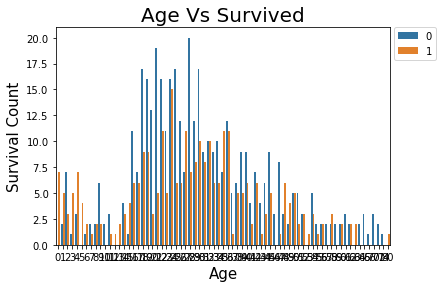

In [19]:
# Visualizing 'Survived' Vs 'Age'
sns.countplot(x='Age', data=train_df, hue='Survived')
plt.title('Age Vs Survived', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

#### To have a proper visualization of `Age` column we can create range of ages say 0-20, 21-40, 41-60, 61-80 and label them as 0,1,2,3.

In [20]:
# Create ordinal category for Age using binning method cut
cutLabels= [0,1,2,3]
cutBins = [0, 21, 41, 61, 80]
train_df['Age_Bins'] = pd.cut(train_df['Age'], bins=cutBins, labels=cutLabels)

In [21]:
train_df.Age_Bins.value_counts()

1    368
0    197
2    123
3     19
Name: Age_Bins, dtype: int64

#### Now we can remove `Age` Column and use `Age_Bin` for visualization and analysis 

In [22]:
# Drop 'Age' column
train_df.drop(['Age'], axis=1, inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bins
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,B96 B98,S,1


We will need to change data type of new `Age` columns `Age_Bins` from **category to int**.

In [23]:
# change data type of Age_Bins using LabelEncoder
num = LabelEncoder()
train_df['Age_Bins'] = num.fit_transform(train_df['Age_Bins'].astype('str'))

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 714 entries, 0 to 890

Data columns (total 12 columns):

 #   Column       Non-Null Count  Dtype  

---  ------       --------------  -----  

 0   PassengerId  714 non-null    int64  

 1   Survived     714 non-null    int64  

 2   Pclass       714 non-null    int64  

 3   Name         714 non-null    object 

 4   Sex          714 non-null    object 

 5   SibSp        714 non-null    int64  

 6   Parch        714 non-null    int64  

 7   Ticket       714 non-null    object 

 8   Fare         714 non-null    float64

 9   Cabin        714 non-null    object 

 10  Embarked     714 non-null    object 

 11  Age_Bins     714 non-null    int64  

dtypes: float64(1), int64(6), object(5)

memory usage: 92.5+ KB


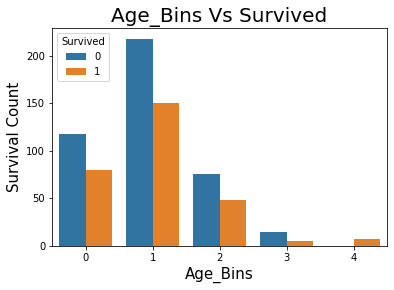

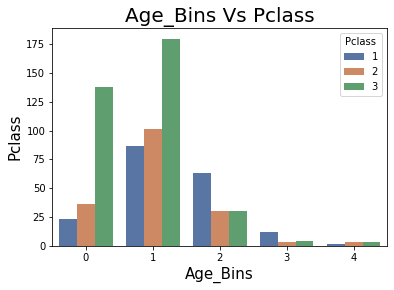

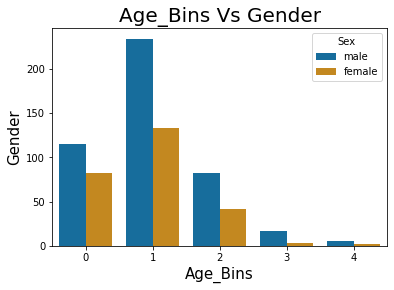

In [25]:
# Visualizing 'Survived' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=train_df, hue='Survived')
plt.title('Age_Bins Vs Survived', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=train_df, hue='Pclass', palette='deep')
plt.title('Age_Bins Vs Pclass', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Pclass', fontsize=15)
plt.show()

# Visualizing 'Gender' Vs 'Age_Bins'
sns.countplot(x='Age_Bins', data=train_df, hue='Sex', palette='colorblind')
plt.title('Age_Bins Vs Gender', fontsize=20)
plt.xlabel('Age_Bins', fontsize=15)
plt.ylabel('Gender', fontsize=15)
plt.show()

`0-20 = 0, 21-40 = 1, 41-60 = 2, 61-80 = 3`
1. Passengers between age group of `21 to 40 had highest death counts`.
2. While, passenger between age group of `61-80 had lowest death counts`.
3. In above visualizations, last two visualizations prove that the reason behind high number of deaths will be counted for passengers of age group betweem 21 to 40 because<br>
  - Most of the passengers in that age group are from 3rd class and this class seems to have higher number of deaths as per visualization. *{Refer `Age_Bins Vs Gender` and `Pclass Vs Survived` visualization respectively}*
  - Most of the passengers are male in this age group and male will have higher number of deaths *{Refer Sex Vs Survived visualization}*

### 2.1.3 Survived Vs SibSp

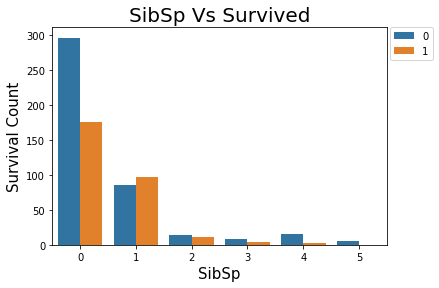

In [26]:
# Visualizing 'Survived' Vs 'SibSp'
sns.countplot(x='SibSp', data=train_df, hue='Survived')
plt.title('SibSp Vs Survived', fontsize=20)
plt.xlabel('SibSp', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

1. Visualization shows that passengers with `0 or 2 or 3 or 4 or 5 siblings/spouses can have higher number of deaths(0) than survival (1)`.
2. While passengers with with `1 sibling/spouse have less death counts and more survival count`.
3. But passengers with `0 or 3 or 4 or 5 siblings/spouses are the ones with high death rates`.

### 2.1.3 Survived Vs Parch

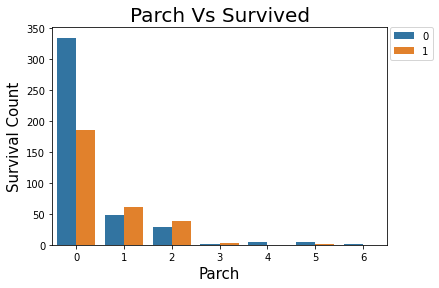

In [27]:
# Visualizing 'Survived' Vs 'Parch'
sns.countplot(x='Parch', data=train_df, hue='Survived')
plt.title('Parch Vs Survived', fontsize=20)
plt.xlabel('Parch', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

1. Passengers with `0 or 4 or 5 or 6 Parents / Childrens seems to have higher deaths (0) than survival (1)`.
2. Passengers with `1 or 2 or 3 Parents/Childrens seems to have high surival chances than deaths`. 


### 2.1.3 Survived Vs Embarked

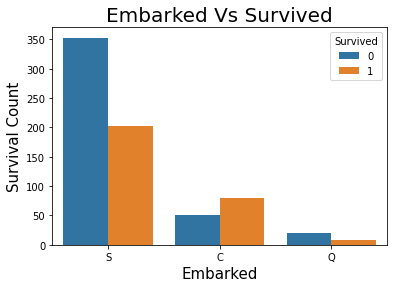

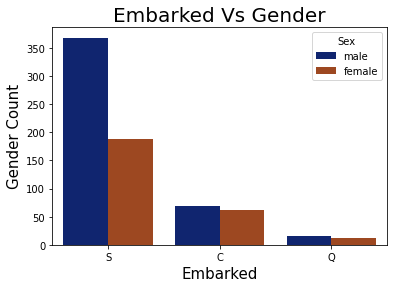

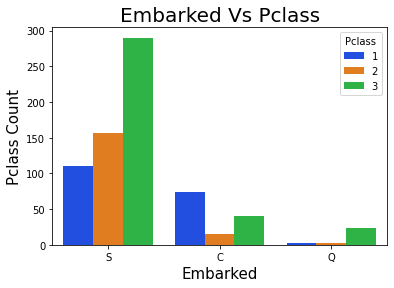

In [28]:
# Visualizing 'Survived' Vs 'Embarked'
sns.countplot(x='Embarked', data=train_df, hue='Survived')
plt.title('Embarked Vs Survived', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Survival Count', fontsize=15)
plt.show()

# Visualizing 'Gender' Vs 'Embarked'
sns.countplot(x='Embarked', data=train_df, hue='Sex', palette='dark')
plt.title('Embarked Vs Gender', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Gender Count', fontsize=15)
plt.show()

# Visualizing 'Pclass' Vs 'Embarked'
sns.countplot(x='Embarked', data=train_df, hue='Pclass', palette='bright')
plt.title('Embarked Vs Pclass', fontsize=20)
plt.xlabel('Embarked', fontsize=15)
plt.ylabel('Pclass Count', fontsize=15)
plt.show()

1. Passengers embraked from Southampton and Queensland will have high death counts than survival.
2. While passengers embarked from Cherbourgh will have high survival chances.
3. Reason behind such difference could be seen in **Embarked Vs Gender** and **Embarked Vs Pclass** visualization that
  - Firstly, the number of male count is high among passengers embarking from Southampton and slightly high in Queensland. 
  - Secondly, passengers embarked from these two places have most passengers travelling in 3rd class.
  - We have seen that males have low survival chances and if they having 3rd class ticket than survival chances depletes drasctically.<br>
`Note: Above two reasons justify the higher rate of deaths in passengers embarked from Southampon and Queensland`.

# Step 3: Data Preparation

## 3.1 Dropping Irrelavant variables

#### `Fare`, `Ticket`, `PassengerId`, `Cabin` and `Name` columns make no impact and seems to be irrelevant for prediction. Hence, we can drop them.

In [29]:
# Drop Fare, Ticket, PassengerId, Cabin and Name columns
train_df.drop(['Fare','Ticket','PassengerId','Cabin','Name'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins
0,0,3,male,1,0,S,1
1,1,1,female,1,0,C,1
2,1,3,female,0,0,S,1
3,1,1,female,1,0,S,1
4,0,3,male,0,0,S,1


In [30]:
# conforming changes
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins
0,0,3,male,1,0,S,1
1,1,1,female,1,0,C,1
2,1,3,female,0,0,S,1
3,1,1,female,1,0,S,1
4,0,3,male,0,0,S,1


## 3.2 Convert Categorical variable to Ordinal variables

#### To bring more understanding let's convert columns like `Sex` and `Embarked` to ordinal category 0,1,2,etc.

In [31]:
# Convert male = 0 and female = 0 in column Sex
train_df['Sex'] = train_df['Sex'].map(dict(zip(['male','female'],[0,1])))

In [32]:
# Convert C=0, Q=1 and S=2 in Embarked column
train_df['Embarked'] = train_df['Embarked'].map(dict(zip(['C','Q','S'],[0,1,2])))

In [33]:
# conforming changes in data
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins
0,0,3,0,1,0,2,1
1,1,1,1,1,0,0,1
2,1,3,1,0,0,2,1
3,1,1,1,1,0,2,1
4,0,3,0,0,0,2,1


## 3.3 Visualize Correlation between all variables

In [34]:
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Bins
0,0,3,0,1,0,2,1
1,1,1,1,1,0,0,1
2,1,3,1,0,0,2,1
3,1,1,1,1,0,2,1
4,0,3,0,0,0,2,1


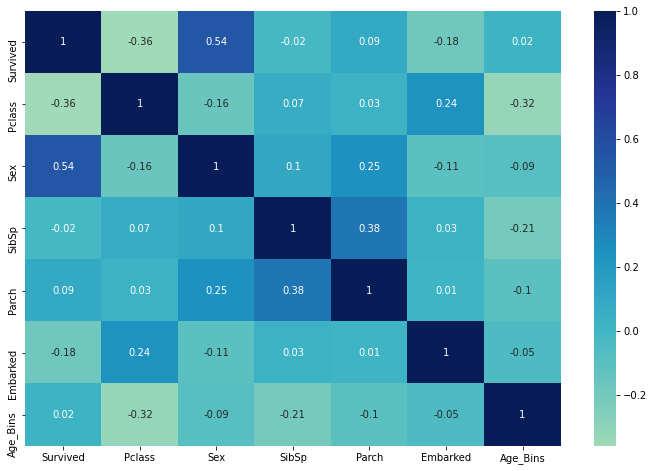

In [35]:
# Visualizing correlation of all variables with traget variable
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr().round(2), annot=True, cmap='YlGnBu', center=0)
plt.show()

1. `Sex` variables seems to be positively correlated with target variable `Survived` and seems to be highly correlated with target variable.
2. `Pclass` variables seems to be negatively correlated with target variable `Survived` and seems to be least correlated with target variable.
3. Remaining variables `Parch`,`SibSp`,`Age_Bins` and `Embarked` also seems to be correlated with good numbers. 

# Conclusion

---
Following variables could be considered as importnat variables for model building and these variables are perfectlt correlated to target variable **Survived**. <br>
- Pcalss, 
- Sex, 
- SibSp, 
- Parch,
- Embarked,
- Age_Bins.
---


